# KBonus light curve of Kepler 686

The light curves released in Martinez-Palomera et al. 2023 follow MAST standards and a similar structure as Kepler Light Curve Files (LCFs).
These can be loaded using the [LightKurve](https://github.com/lightkurve/lightkurve) package. 

In this notebook we will show how to open the FITS files and find Kepler-686b.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
from lightkurve.io.generic import read_generic_lightcurve

## 1. Load files with `lightkurve`

### 1.1 Read the primary header

We can read the file with the `.read()` from the lightkurve package. 
This will read from the primary header, then the fully stitched light curve will be loaded. 

In [54]:
# download Kepler pipeline file from MAST
kepler = lk.search_lightcurve("Kepler-686", cadence="long", mission="Kepler", author="Kepler").download_all()
kepler

LightCurveCollection of 15 objects:
    0: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=6 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=7 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    5: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=8 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    6: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=9 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    7: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=10 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    8: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=11 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    9: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=12 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    10: <KeplerLightC

In [55]:
#download KBonus-BKG light curve
kbonus = lk.search_lightcurve("Kepler-686", cadence="long", mission="Kepler", author="KBONUS-BKG").download()
kbonus

time,flux,flux_err,cadenceno,quarter,quality,sap_flux,sap_flux_err,psf_flat_flux,psf_flat_flux_err,sap_quality,flatten_mask
,electron / s,electron / s,,,,electron / s,electron / s,electron / s,electron / s,,
Time,float64,float64,int32,int64,int32,float64,float64,float64,float64,int32,int32
169.7659579482861,8043.647435275865,3.2835956679785623,2977,2,393216,7016.037236598841,4.0224831177088785,8027.20819185659,3.529999591175291,393216,0
169.78639211133122,8046.977009376297,3.2841161422516802,2978,2,393216,7019.1037710586525,4.022833602381577,8031.220565055059,3.4982927311422127,393216,0
169.806826074142,8046.641248840255,3.284808412319694,2979,2,393216,7016.0053937701805,4.022742432900196,8031.54086809312,3.4699338996303486,393216,0
169.8272602367215,8041.0262912561775,3.2840502198001302,2980,2,393216,7015.2561039151715,4.0224846956931515,8026.553944585402,3.451879694301135,393216,0
169.8476941990666,8042.558108079777,3.285109456547239,2981,2,393216,7011.984982031115,4.02260533607928,8028.6990475391685,3.4228306965829915,393216,0
169.86812836071476,8044.4239738008155,3.2852245530559485,2982,2,393216,7016.316517022161,4.023056287344469,8031.1567499805715,3.3931608336308896,393216,0
169.88856232259423,8052.469490319957,3.286196496266178,2983,2,393216,7022.4586642634085,4.022771450214411,8039.779092953721,3.3820026894314963,393216,0
...,...,...,...,...,...,...,...,...,...,...,...


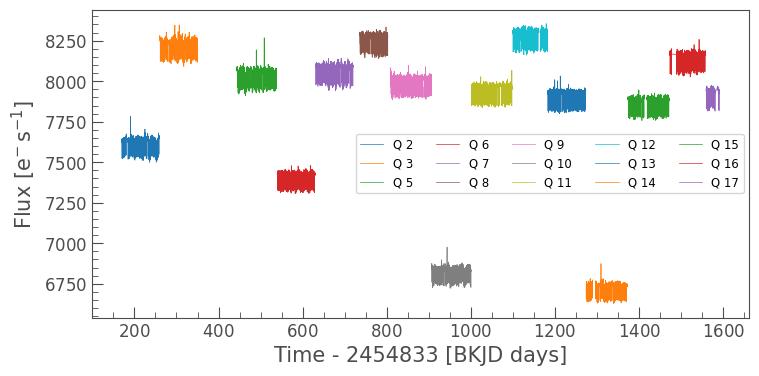

In [69]:
# plot Kepler light curve 
ax = kepler.plot()
ax.legend([f"Q {x}" for x in kepler.quarter], ncols=5, fontsize="small")
plt.show()

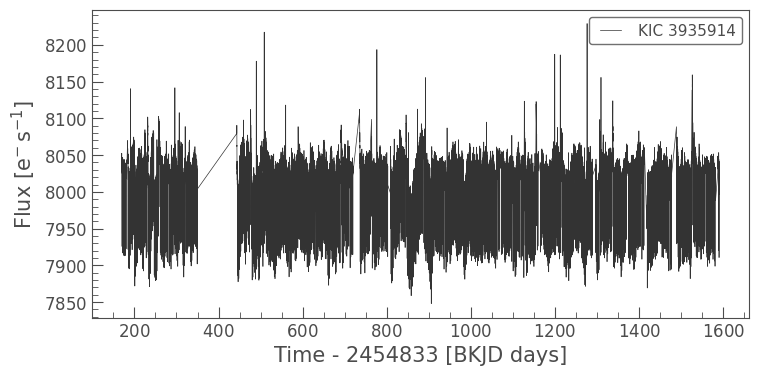

In [70]:
# plot KBonus stitched light curve 
# the default column is psf_flux
kbonus.plot(column="flux")
plt.show()

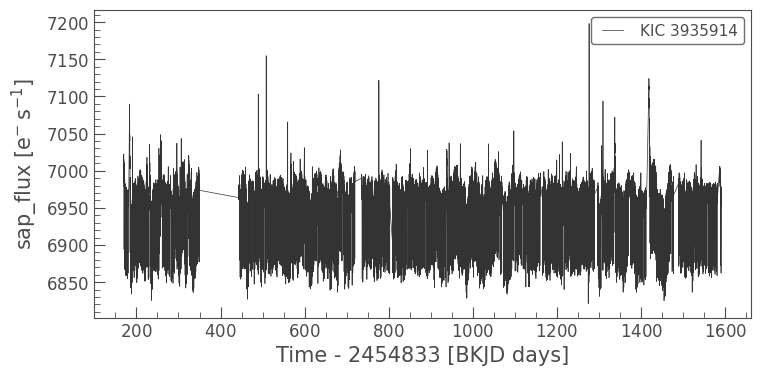

In [71]:
# we can also plot sapt_flux
kbonus.plot(column="sap_flux")
plt.show()

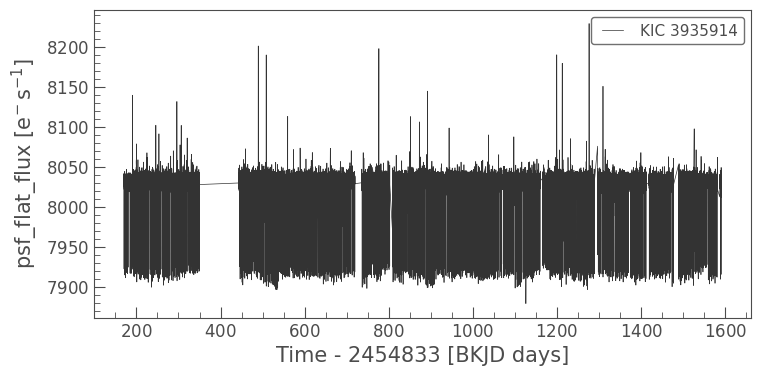

In [72]:
# and a flatten version of the psf flux
ax = kbonus.plot(column="psf_flat_flux")
plt.show()

## 1.2 Read the multi-extensions as LightCurve objects

We can load the per-quarter light curves that are stored in the other extensions using the `read_generic_lightcurve()` method.
This is useful in case a specific quarter light curve gets rejected from the stitched version.
The later happens for sources with a PSF fraction lower than 50%. 
Also, centroid information and background light curves are stored in this extension. 

In [87]:
# we can load the per-quarter series stored in the multi-extension FITS file
hdul = fits.open(kbonus.filename)
    
aux = []
for k in range(len(hdul)):
    if "LIGHTCURVE_Q" in hdul[k].name:
        aux.append(read_generic_lightcurve(kbonus.filename, ext=k, time_format = "bkjd"))
kbonusq = lk.LightCurveCollection(aux)
kbonusq

LightCurveCollection of 15 objects:
    0: <LightCurve LABEL="KIC 3935914" QUARTER=2 FLUX_ORIGIN=flux>
    1: <LightCurve LABEL="KIC 3935914" QUARTER=3 FLUX_ORIGIN=flux>
    2: <LightCurve LABEL="KIC 3935914" QUARTER=5 FLUX_ORIGIN=flux>
    3: <LightCurve LABEL="KIC 3935914" QUARTER=6 FLUX_ORIGIN=flux>
    4: <LightCurve LABEL="KIC 3935914" QUARTER=7 FLUX_ORIGIN=flux>
    5: <LightCurve LABEL="KIC 3935914" QUARTER=8 FLUX_ORIGIN=flux>
    6: <LightCurve LABEL="KIC 3935914" QUARTER=9 FLUX_ORIGIN=flux>
    7: <LightCurve LABEL="KIC 3935914" QUARTER=10 FLUX_ORIGIN=flux>
    8: <LightCurve LABEL="KIC 3935914" QUARTER=11 FLUX_ORIGIN=flux>
    9: <LightCurve LABEL="KIC 3935914" QUARTER=12 FLUX_ORIGIN=flux>
    10: <LightCurve LABEL="KIC 3935914" QUARTER=13 FLUX_ORIGIN=flux>
    11: <LightCurve LABEL="KIC 3935914" QUARTER=14 FLUX_ORIGIN=flux>
    12: <LightCurve LABEL="KIC 3935914" QUARTER=15 FLUX_ORIGIN=flux>
    13: <LightCurve LABEL="KIC 3935914" QUARTER=16 FLUX_ORIGIN=flux>
    14: <LightC

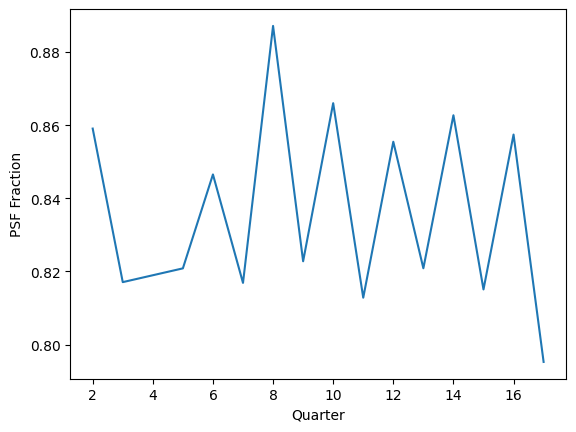

In [97]:
# plot the PSF fraction in every quarter
psf_frac = np.array([x.PSFFRAC for x in lcq])
quarters = np.array([x.quarter for x in lcq])

plt.plot(quarters, psf_frac)
plt.xlabel("Quarter")
plt.ylabel("PSF Fraction")
plt.show()

Values >0.85 can be consider as full PSF coverage, the value lower than 1 is due to finite integration becouse of Kepler pixel size.

## 2. Recover exploanet

We use the known period to search for a planet with period 1.59 days. using the KBonus flatten light curve

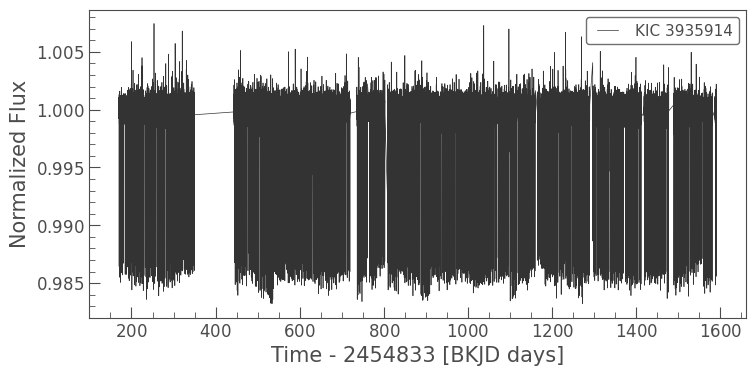

In [83]:
# set the flattben version as default column and clean outliers
# flatten_mask has a quality mask to reject data points with outlier durin the flattening

kbonus_flat = kbonus[kbonus.flatten_mask == 0].copy()
kbonus_flat["flux"] = kbonus_flat["psf_flat_flux"]
kbonus_flat["flux_err"] = kbonus_flat["psf_flat_flux_err"]
kbonus_flat = kbonus_flat.remove_outliers(sigma_lower=100, sigma_upper=3).normalize()
kbonus_flat.plot()
plt.show()

### 3.1 KBonus light curve

1.5947404463097683 d


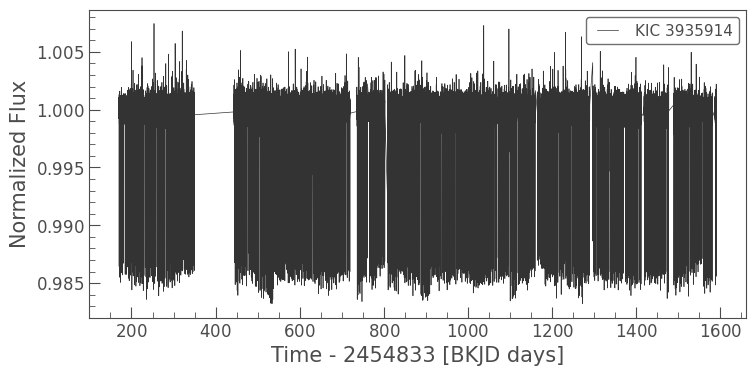

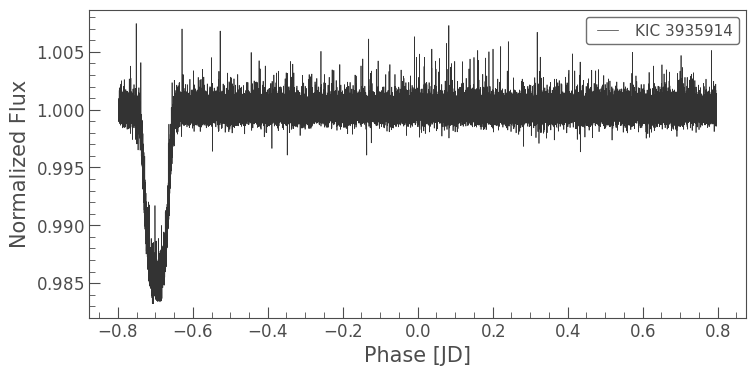

####################################################################################################


In [84]:
# known planets and periods

# planets = ["b", "c", "d", "e", "f"]
# periods = [2.090876, 6.155557, 13.233549, 23.654, 50.447]

planets = ["b"]
periods = [1.594745463]


for n, P in zip(planets, periods):
    kbonus_flat.plot()
    # plt.show()

    per = kbonus_flat.to_periodogram(method="bls", frequency_factor=100, minimum_period=P*.99, maximum_period=P*1.01)
    print(per.period_at_max_power)

    kbonus_flat.fold(period=per.period_at_max_power, epoch_phase=per.transit_time_at_max_power.value).plot()

    plt.show()
    print("#####"*20)

### 3.2 Kpler PDC light curve

1.5947467417580288 d


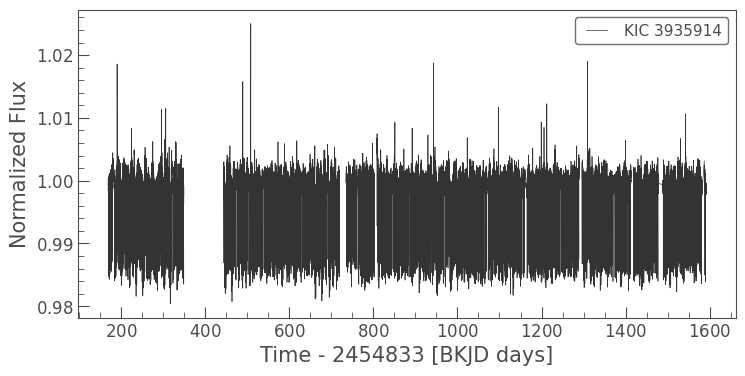

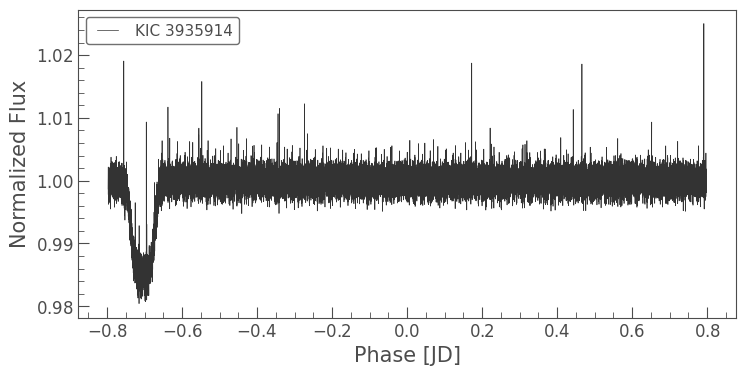

####################################################################################################


In [85]:
# now we compare with Kepler PDC light curve

kepler_s = kepler.stitch()

for n, P in zip(planets, periods):
    kepler_s.plot()
    # plt.show()

    per = kepler_s.to_periodogram(method="bls", frequency_factor=100, minimum_period=P*.99, maximum_period=P*1.01)
    print(per.period_at_max_power)

    kepler_s.fold(period=per.period_at_max_power, epoch_phase=per.transit_time_at_max_power.value).plot()

    plt.show()
    print("#####"*20)